<h1><b>The Sparks Foundation</b></h1>

<h1><b>Data science and Business Analytics Internship</b></h1>

<h1><b>Task1 : Prediction Using Supervised ML</b></h1>
<p>Predict the percentage of an student based on the no. of study hours</p>
<ul>
<li>In this task I'll present how the Python Scikit-Learn library for machine learning can be used to implement regression functions.</li>
<li>I will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.</li>
</ul>


<h2><b>By: Riddhi Chodvadiya</b></h2>


<h3>Import essential libraries</h3>
<ul><li>Pandas to manage the dataframes and enables us to read various datasets into a data frame.</li>
    <li>Numpy to save the Hours and Score values in different arrays.</li>
   <li> Scikit to split the data into two sets :- 1). Training set, 2). Test set.</li>
    <li>Matplotlib to represent the train model in pictorial form. 
</li></ul>

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

Read the data from the given CSV file, and assign it to variable "df"

In [4]:
df = pd.read_csv('http://bit.ly/w-data')

show the first 5 rows using dataframe.head() method

In [5]:
print("The first 5 rows of the dataframe") 
df.head(5)

The first 5 rows of the dataframe


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


<h3>Data Types</h3>
<p>The main types stored in Pandas dataframes are <b>object</b>, <b>float</b>, <b>int</b>, <b>bool</b> and <b>datetime64</b>.
</p>


In [6]:
df.dtypes

Hours     float64
Scores      int64
dtype: object

<h3>Describe</h3>
It gives a statistical summary of each column, such as count, column mean value, column standard deviation, etc. We use the describe method:



In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<h3>shape</h3>
<p>To get the information about how many rows and columns are there in database we use the shape method.</p>
<p>It return tuple as output where first value represents number of records(rows) and second value represents number of fields(columns).</p> 

In [8]:
df.shape

(25, 2)

<h2><b>Data Visualization</b></h2>

<h3>Correlation</h3>
Correlation is a measure of the extent of interdependence between variables.

we can calculate the correlation between variables  of type "int64" or "float64" using the method "corr":

In [9]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [10]:
# Assign both of the fields(Hours, Scores) and store it to two different variable named x and y respectively.
x=df[['Hours']]
y=df[['Scores']]

Plot the data into graph

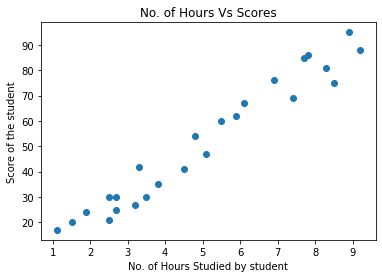

In [11]:
# Giving appropriate lables for axises and title for graph
plt.scatter(x,y)
plt.title("No. of Hours Vs Scores")
plt.xlabel("No. of Hours Studied by student")
plt.ylabel("Score of the student")
plt.show()

The graph above shows that the variables x and y have a HIGH POSITIVE LINEAR CORRELATION.(high positive beacause all points are nearby)

<h2><b>Training and Testing</b></h2>

In [12]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values

In [13]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 5
number of training samples: 20


The test_size parameter sets the proportion of data that is split into the testing set. In the above, the testing set is set to 20% of the total dataset.

<p>If one does not mention the random_state in the code, then whenever the person executes your code a new random value is generated and the train and test datasets would have different values each time.</p>

<p>However, if the person use a particular value for random_state(random_state = 1 or any other value) everytime the result will be same,i.e, same values in train and test datasets.</p>

<h3><b>Training the Model</b></h3>

In [14]:
from sklearn.linear_model import LinearRegression  
lm = LinearRegression()  
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<b>Plotting the regression line</b>


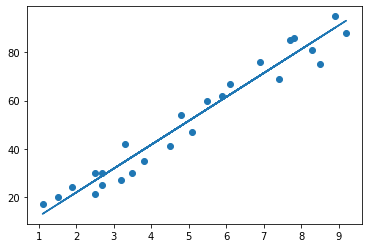

In [15]:
line = lm.coef_ * X + lm.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

When evaluating our model, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

<p>To determine the accuracy of a model we use score() method of R squared measure</p>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.
</p>


In [16]:
acc=lm.score(x_test,y_test)
print("The accuracy of the Linear Regression Model created above is: ",acc)

The accuracy of the Linear Regression Model created above is:  0.9454906892105354


<h3><b>Prediction of Output</b></h3>

In [17]:
Yhat=lm.predict(x_test)
print('The output of predicted value is: ',Yhat)

The output of predicted value is:  [16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [18]:
#Comparing Actual score vs Predicted score
df1= pd.DataFrame({'ACTUAL SCORE':y_test,'PREDICTED SCORE':Yhat})
df1

,ACTUAL SCORE,PREDICTED SCORE
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Testing with your own data

In [19]:
hours = np.array([9.25])
own_pred = lm.predict(hours.reshape(-1,1))
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [9.25]
Predicted Score = 93.69173248737539


<h3><b>Evaluation of Model</b></h3>

In [20]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Yhat))

Mean Absolute Error: 4.183859899002982


In [21]:
from sklearn.metrics import r2_score
print(' R-Squared :\t',metrics.r2_score(y_test, Yhat))

 R-Squared :	 0.9454906892105354


In [22]:
from sklearn.metrics import mean_squared_error
print(' Mean Squared Error :\t',mean_squared_error(y_test, Yhat))

 Mean Squared Error :	 21.598769307217456
